# Health Insurance Cost Prediction PreProcessing and Training Data Development

In [52]:
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 
from sklearn import tree, metrics

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
rng = np.random.default_rng()

In [5]:
train_ind = rng.choice(insurance.index, round(len(insurance)*0.6))
train_set = insurance.iloc[train_ind]

In [6]:
X_num = train_set[['age','bmi','children']].values
X_cat = train_set[['sex','smoker','region']].values

In [7]:
y = train_set['charges'].values

In [8]:
model = linear_model.LinearRegression()
model.fit(X_num, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
cat_encoder = preprocessing.OneHotEncoder()

In [10]:
cat_encoder.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [11]:
X_cat_2 = cat_encoder.transform(X_cat).toarray()

In [12]:
model2 = linear_model.LinearRegression()

In [13]:
model2.fit(X_cat_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(model2.predict(X_cat_2))

[ 9322.98520747  9322.98520747  7817.23893296  7429.29106539
  8628.61239755  9431.83689883 33043.34831031  7429.29106539
 33043.34831031  8511.61174288  9322.98520747 33043.34831031
  7817.23893296  8628.61239755  8240.66452998  7817.23893296
  8511.61174288  8240.66452998  8628.61239755  7429.29106539
  8620.46343424 33152.20000167  9431.83689883 32340.82653708
 32340.82653708 32340.82653708  7429.29106539 31149.65416823
  8620.46343424  7429.29106539  7817.23893296  9431.83689883
 33043.34831031  8511.61174288  7429.29106539  7817.23893296
  7817.23893296 32340.82653708  9322.98520747  8511.61174288
  7817.23893296 33043.34831031 32231.97484572 32340.82653708
  8628.61239755 32231.97484572 32231.97484572  9431.83689883
  8620.46343424  8511.61174288  7817.23893296 31537.6020358
  9322.98520747  9431.83689883  7429.29106539  7817.23893296
 32231.97484572  8240.66452998  8511.61174288  7817.23893296
 33152.20000167  8240.66452998  8628.61239755  8511.61174288
  8511.61174288  8511.611

In [15]:
X_cat_2[0:5,:]

array([[1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.]])

In [16]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [17]:
X_re = np.concatenate([X_num,X_cat_2],axis=1)

model_re = linear_model.LinearRegression()

model_re.fit(X_re, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model_re.predict(X_re)

array([16972.52646609,  9770.35535289,  5787.43060898,   805.50737632,
        4411.44138362, 11840.53000431, 35143.77908868,  6478.04267013,
       40241.55485258, 10887.16533596, 13945.27153346, 35143.77908868,
       11025.40836397,  9083.26955429,  7021.28011617,  3547.00789931,
        5890.05138733,  4260.60992931, 11510.04137763, 12399.37623423,
       10511.68160936, 32295.7834505 , 16527.51475714, 27895.48419758,
       28100.56106146, 33913.9588905 ,  8921.4250676 , 34438.57337538,
       12631.96346401,  4937.27326919,  6675.86460195, 14575.45392542,
       29455.06236696,   109.42287398,  7263.38006283,  4485.91411243,
        8735.17983269, 34143.80386705,  6295.92676718,  5767.84590329,
        1185.97699005, 29473.80826911, 27780.52601724, 32186.44621357,
        9313.38808703, 28225.01854989, 33445.13459595,  6810.15274915,
        4688.15235819,  7657.9891788 ,  4809.69467132, 33507.80153028,
        9912.64729929, 14418.88959009, 12333.86671807,  6992.96826057,
      

In [19]:
y - model_re.predict(X_re)

array([-8.87398966e+02,  8.15894802e+03,  5.95041823e+03,  2.07898749e+04,
       -2.53095438e+03, -3.01654425e+03,  5.83038581e+03,  1.29643108e+04,
        2.35288732e+04,  8.56133664e+02, -5.37540973e+03,  5.83038581e+03,
       -1.39501136e+03, -2.89714255e+03, -3.46435782e+03,  1.53308810e+03,
       -1.05246909e+03,  1.97990703e+04,  2.36500932e+04, -3.66614698e+03,
        8.98503756e+03, -1.23310372e+04,  1.50924863e+04,  5.58033295e+03,
       -1.19617990e+04, -1.15013104e+04,  3.80468482e+02,  6.28197767e+03,
       -1.89509271e+03, -3.01995487e+03, -1.92479460e+03, -4.69977353e+03,
       -1.03472828e+04,  1.01245103e+03, -8.07517413e+02, -1.99189211e+03,
        1.33023317e+03,  5.41269063e+03, -1.73308467e+03, -1.31838390e+03,
        9.17103010e+02,  6.54720293e+03, -1.01173818e+04, -1.09270683e+04,
       -5.32354709e+03,  8.08277975e+03,  6.82851090e+03, -2.86655735e+03,
       -1.04306296e+03, -3.78225508e+03, -1.21821467e+03, -9.93952953e+03,
       -2.27892670e+03, -

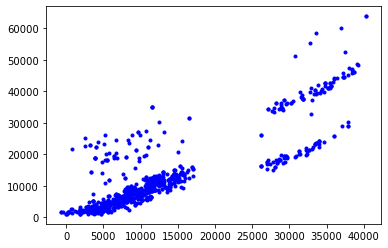

In [20]:
plt.plot(model_re.predict(X_re), y, 'b.')

In [21]:
model_re.score(X_re, y)

0.7231102411789784

In [22]:
model_re.coef_[0:3]

array([243.07040786, 254.50023194, 245.38722668])

In [23]:
X_cat_2[0:5,:]

array([[1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.]])

In [24]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [25]:
model_re.coef_[3:]

array([   457.20973837,   -457.20973837, -12154.13610303,  12154.13610303,
          577.37883042,    112.83076799,   -511.88023765,   -178.32936076])

In [33]:
insurance2 = pd.get_dummies(insurance)

In [34]:
insurance2

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [36]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

In [37]:
X = insurance2.drop('charges', axis = 1)
y = insurance2.charges

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 246)

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [61]:
y_pred = LR.fit(X_train, y_train)

In [45]:
X_t = pd.get_dummies(X_train)

In [46]:
y_pred = LR.predict(X_t)

In [47]:
y_pred

array([ 2.90098342e+04,  1.22348067e+04, -4.23212559e+02,  1.71738045e+04,
        8.67446851e+03,  3.15899859e+04,  1.28328790e+04,  5.71101310e+03,
        1.64444357e+04,  1.17906285e+04,  1.11203676e+04,  1.25048093e+04,
        1.07807996e+04,  3.60214643e+04,  3.37607272e+03,  2.79130626e+04,
        1.14494215e+04,  1.50641663e+03,  6.15562515e+03,  7.98788137e+03,
        1.73935066e+03,  9.43464884e+03,  9.06944969e+03,  1.29609392e+04,
        9.35863707e+03,  3.17680783e+04,  2.69564695e+04,  1.25225212e+03,
        1.20589367e+04,  8.15871592e+03,  4.25199397e+03,  1.30119304e+04,
        9.07622184e+03,  3.42669512e+04,  1.49597829e+03,  1.42684327e+04,
        1.75726858e+04,  1.15985763e+04,  2.36722468e+03,  3.91709104e+04,
        3.29745902e+04,  2.45581361e+04,  3.69633194e+04,  6.44375777e+02,
        8.03405948e+03,  8.15583121e+02,  3.34515944e+04,  1.48428294e+04,
        2.80101301e+04,  1.57262967e+04,  4.88142087e+03,  1.00875579e+04,
        8.15626065e+03,  

This is the array of where the features are factored to predicting the charges for the customers.

In [48]:
y_pred = pd.Series(y_pred)

In [49]:
y_pred

0      29009.834165
1      12234.806703
2       -423.212559
3      17173.804540
4       8674.468509
           ...     
931    24042.920649
932    12187.794763
933     7659.817051
934    30057.330326
935    10117.352497
Length: 936, dtype: float64

<AxesSubplot:xlabel='age', ylabel='bmi'>

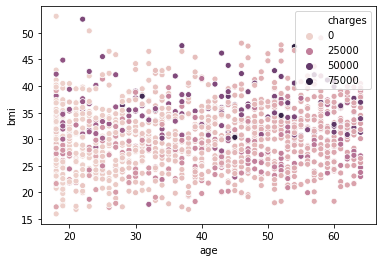

In [57]:
sns.scatterplot(y="bmi", x= "age", hue = y, data =X)

<AxesSubplot:xlabel='age', ylabel='bmi'>

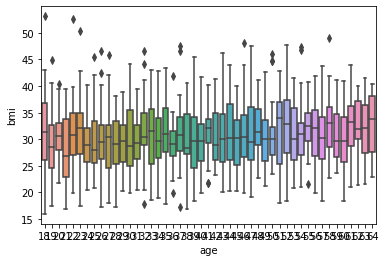

In [59]:
sns.boxplot(y="bmi", x= "age", data = X)

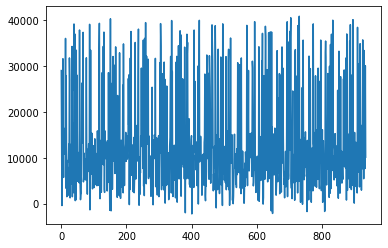

In [60]:
plt.plot(y_pred)